# PREDICTION USING UNSUPERVISED ML
* To predict optimum number of cluster and represent it visually

## Importing the important library for data visulisation and manipulation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data 

In [3]:
from sklearn import datasets

raw_data = datasets.load_iris()
data = pd.DataFrame(raw_data.data , columns = raw_data.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
raw_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# Define x 
x = data.iloc[:,[0,1,2,3]].values

## Determining the number of cluster using elbow method


In [6]:
from sklearn.cluster import KMeans

wcss =[] # within cluster sum of squared distance

for k in range (1,12):
  model = KMeans(n_clusters = k)
  model.fit(x)
  wcss.append(model.inertia_)



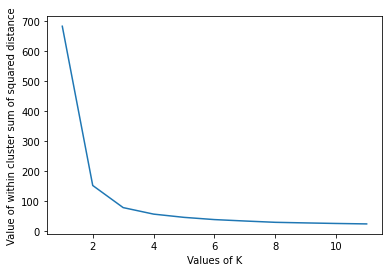

In [7]:
# Plotting the above model to get the elbow graph
plt.plot(range(1,12),wcss)
plt.xlabel("Values of K")
plt.ylabel("Value of within cluster sum of squared distance")
plt.show()

## Training the model with the best number of cluster obtained from above elbow.

In [19]:
final_model = KMeans(n_clusters = 3 ,max_iter = 500, random_state =0)


pred =final_model.fit_predict(x)

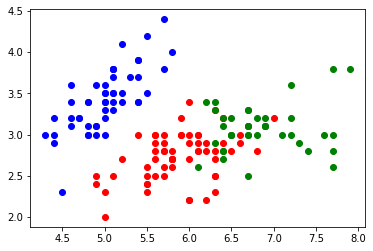

In [21]:
colours = ['red', 'blue', 'green', 'yellow', 'orange']
 
for i in np.unique(final_model.labels_):
    plt.scatter(x[pred==i, 0],
                x[pred==i, 1],
                c = colours[i])

## Finally ! visualisation of the clustering .

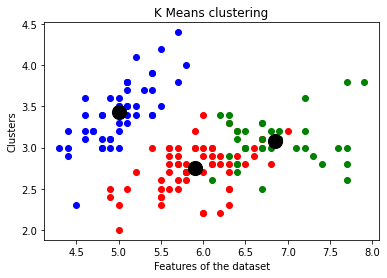

In [23]:
colours = ['red', 'blue', 'green', 'yellow', 'orange']
 
for i in np.unique(final_model.labels_):
    plt.scatter(x[pred==i, 0],
                x[pred==i, 1],
                c = colours[i])
plt.scatter(final_model.cluster_centers_[:, 0],
            final_model.cluster_centers_[:, 1],
            s = 200,  # marker size
            c = 'black')
 
plt.title('K Means clustering')
plt.xlabel('Features of the dataset')
plt.ylabel('Clusters')
plt.show()